# 6.4: Supervised Machine Learning: Regression

### This script contains the following:

#### 1. Importing libraries and data
#### 2. Exploratory Data Analysis
#### 3. Data Prep for Regression Analysis
#### 4. Regression analysis
    Comparing how the regression fits with the training set

# Importing Libraries and Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
#Create a folderpath shortcut

path = r'/Users/kerimzengin/Desktop/Data Analytics/Data Analytics Immersion/Achievement 6 - Advanced Analytics & Dashboard Design'

In [4]:
#Reading the cleaned bank dataset and putting it in a dataframe

df = pd.read_pickle(os.path.join(path, 'Data', 'Prepared Data', 'bank_cleaned_2.pkl'))

In [5]:
#Check if the import was successful

df.head()

,age,job,marital,country,education,has_default_loan,has_housing_loan,has_personal_loan,contact_type,month_of_contact,...,campaign,num_of_days_last_contact,num_of_contacts_before_campaign,previous_campaign_outcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor_3_mths,num_of_employees,has_term_deposit
0,56,housemaid,married,spain,basic.4y,no,no,no,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,estonia,high.school,unknown,no,no,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,2.133,5191.0,no
2,37,services,married,austria,high.school,no,yes,no,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,lithuania,basic.6y,no,no,no,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,2.132,5191.0,no
4,56,services,married,slovakia,high.school,no,no,yes,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,3.579,5191.0,no


# Exploratory Data Analysis

/Users/kerimzengin/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='euribor_3_mths', ylabel='Density'>

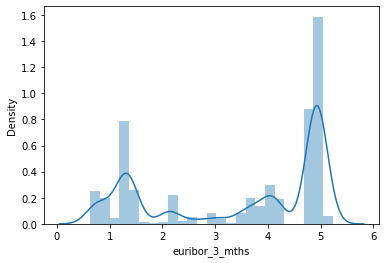

In [6]:
#Create a histograp for the Euribor 3 Months rate variable

sns.distplot(df['euribor_3_mths'], bins=25)

In [7]:
#Get the mean value

df['euribor_3_mths'].mean()

3.4776058560745695

In [8]:
#Get the median value

df['euribor_3_mths'].median()

4.12

In [9]:
#Get the max value

df['euribor_3_mths'].max()

5.233

/Users/kerimzengin/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='num_of_employees', ylabel='Density'>

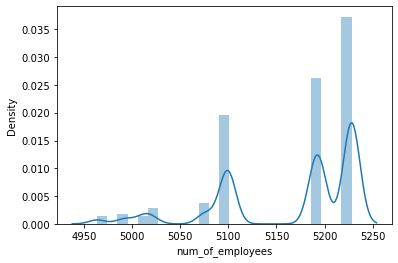

In [10]:
#Create a histogram for the number of employees variable

sns.distplot(df['num_of_employees'], bins=25)

In [11]:
#Get the mean value

df['num_of_employees'].mean()

5167.035910941844

In [12]:
#Get the median value

df['num_of_employees'].median()

5191.0

In [13]:
#Get the max value

df['num_of_employees'].max()

5228.1

# Data Prep for Regression Analysis 

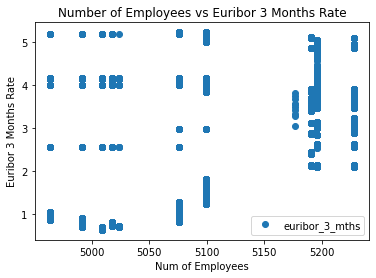

In [14]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df.plot(x = 'num_of_employees', y='euribor_3_mths',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Number of Employees vs Euribor 3 Months Rate')  
plt.xlabel('Num of Employees')  
plt.ylabel('Euribor 3 Months Rate')  
plt.show()

In [15]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df['num_of_employees'].values.reshape(-1,1)
y = df['euribor_3_mths'].values.reshape(-1,1)

In [16]:
#Print the values in the X array

X

array([[5191. ],
       [5191. ],
       [5191. ],
       ...,
       [4963.6],
       [4963.6],
       [4963.6]])

In [17]:
#Print the values in the y array

y

array([[4.857],
       [2.133],
       [4.857],
       ...,
       [1.028],
       [1.028],
       [1.028]])

In [18]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Regression Analysis

In [19]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [20]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [21]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

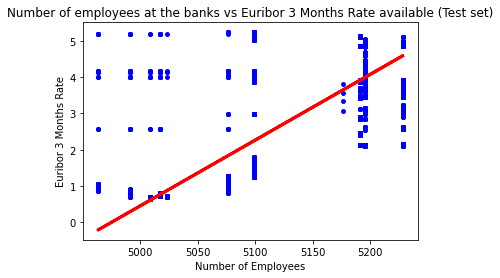

In [22]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='blue', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Number of employees at the banks vs Euribor 3 Months Rate available (Test set)')
plot_test.xlabel('Number of Employees')
plot_test.ylabel('Euribor 3 Months Rate')
plot_test.show()

This regression line graph does not show a true linear regression as some of the data points are quite far away from the line. But interestingly a lot of the data points are situated at the higher amount of number of employees. We could assume that more clients were contacted here at a time when interest rates was quite steady. 

In [23]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score.

In [24]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.01811102]]
Mean squared error:  0.9782144936593077
R2 score:  0.6320392035143949


In [25]:
#Print the values in the y_predicted array

y_predicted

array([[4.58205701],
       [2.24573603],
       [4.58205701],
       ...,
       [2.24573603],
       [3.91013834],
       [4.58205701]])

In [26]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,4.957,4.582057
1,4.021,2.245736
2,4.961,4.582057
3,4.963,4.582057
4,4.021,3.997071
5,1.281,2.245736
6,4.856,3.910138
7,4.961,4.582057
8,4.958,4.582057
9,1.266,2.245736


#### Comparing how the regression fits with the training set

In [27]:
# Predict.

y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [28]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [29]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.01811102]]
Mean squared error:  0.9561949960294273
R2 score:  0.6427567982095119


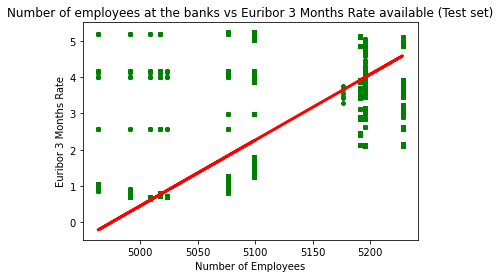

In [30]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Number of employees at the banks vs Euribor 3 Months Rate available (Test set)')
plot_test.xlabel('Number of Employees')
plot_test.ylabel('Euribor 3 Months Rate')
plot_test.show()

In [31]:
# Create a dataframe comparing the actual and predicted values of y.

data_2 = pd.DataFrame({'Actual': y_train.flatten(), 'Predicted': y_predicted_train.flatten()})
data.head(30)

,Actual,Predicted
0,4.957,4.582057
1,4.021,2.245736
2,4.961,4.582057
3,4.963,4.582057
4,4.021,3.997071
5,1.281,2.245736
6,4.856,3.910138
7,4.961,4.582057
8,4.958,4.582057
9,1.266,2.245736


With both models (training and test sets) it looks like it has not done a good job in explaining the relationship between the number of employees and the value of Euribor's 3 months interest rate. The slope's value is low at 0.18, which could mean that if the bank hires more employees, there is a 0.08% chance this could influence the interest rates. 

The MSE value of the test set is very high, at 0.97, which is a little higher comparing to the train set's MSE, which was 0.95. This again leans to the idea that this model is not a good fit at presenting the data.

However, the R2 score is set at 0.63 for the test set and 0.64 for the train set, which indicates there is some correlation between the two variables but overall doing the single regression is not enough to make a good prediction regarding the subscription of term deposits.

In terms of data bias, I did mentioned before in previous exercise that there is potential for human bias as the data was collected via phone calls and submitted by humans. So there is a likliness of human error to occur which could have an effect on the accurancy of the data.